In [13]:
import os
import pandas as pd
from src.preprocessing import preprocess_data, load_data, save_vectorizer
from src.model import train_naive_bayes, train_logistic_regression, train_random_forest
from src.evaluation import evaluate_model, plot_confusion_matrix
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Navigate up one level to the project root and then into the 'src' directory
sys.path.append(os.path.abspath('..'))


# Define paths
DATA_PATH = os.path.join('..', 'data', 'imdb_reviews.csv')

VECTORIZER_PATH = os.path.join('..', 'models', 'tfidf_vectorizer.pkl') 


MODEL_LR = os.path.join('..', 'models', 'logistic_regression_model.pkl') 

MODEL_BN = os.path.join('..', 'models', 'naive_bayes_model.pkl') 

MODEL_RF = os.path.join('..', 'models', 'random_forest_model.pkl') 


ModuleNotFoundError: No module named 'src.preprocessing'

# Medical Image Classification using Deep Learning


## Introduction
In this notebook, we will develop a medical image classification model using deep learning techniques. We will use a pre-trained ResNet model to classify chest X-ray images into two categories: Normal and Pneumonia.


## Dataset Overview
The dataset consists of chest X-ray images categorized into two classes:
- **Normal**: Healthy chest X-rays
- **Pneumonia**: X-rays showing signs of pneumonia

The dataset is divided into three subsets: training, validation, and testing.


In [14]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model

# Navigate up one level to the project root and then into the 'src' directory
sys.path.append(os.path.abspath('..'))




MODEL_Path = os.path.join('..', 'models', 'trained_resnet_model.h5') 



## Visualizing Sample X-ray Images

Before we begin training our model, let's take a moment to explore some sample images from the dataset. This will help us better understand the visual differences between the two classes we are trying to classify: **Normal** and **Pneumonia**.

The dataset contains X-ray images divided into two categories:
- **Normal**: These are X-ray images of healthy lungs.
- **Pneumonia**: These are X-ray images of lungs infected with pneumonia.

Below, we will randomly select and display a few images from each category. This visual inspection provides insight into the challenge of the classification task, and helps in understanding the nature of the data we are working with.


Displaying sample Normal X-ray images:


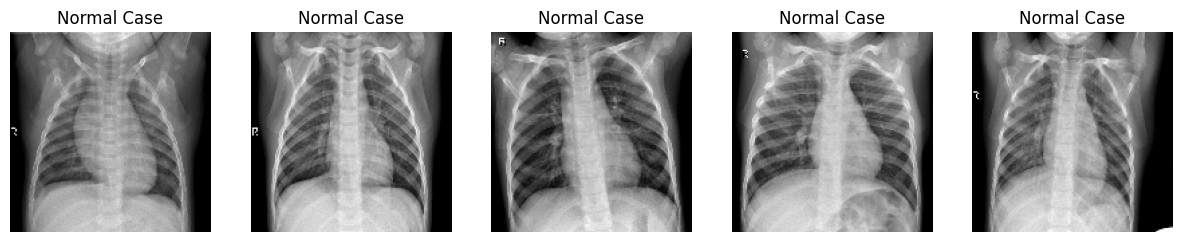

Displaying sample Pneumonia X-ray images:


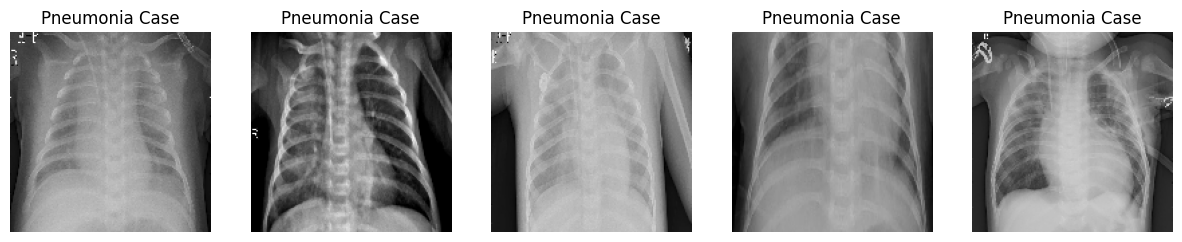

In [10]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directories for normal and pneumonia images
normal_dir = os.path.join('..', 'data', 'train','NORMAL')
pneumonia_dir = os.path.join('..', 'data', 'train','PNEUMONIA')

# Function to display images
def display_sample_images(category, image_dir, num_images=5):
    plt.figure(figsize=(15, 5))
    images = random.sample(os.listdir(image_dir), num_images)  # Randomly select images
    for i, img_name in enumerate(images):
        img_path = os.path.join(image_dir, img_name)
        img = load_img(img_path, target_size=(150, 150))  # Load the image
        img_array = img_to_array(img) / 255.0  # Normalize the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(img_array)
        plt.title(f'{category} Case')
        plt.axis('off')
    plt.show()

# Display sample normal and pneumonia images
print("Displaying sample Normal X-ray images:")
display_sample_images('Normal', normal_dir, num_images=5)

print("Displaying sample Pneumonia X-ray images:")
display_sample_images('Pneumonia', pneumonia_dir, num_images=5)


## Data Preparation
We will prepare our data generators for loading and augmenting the images for training, validation, and testing.


In [18]:

# Define paths
DATA_Path_Train = os.path.join('..', 'data', 'train')
DATA_Path_Test = os.path.join('..', 'data', 'test')
DATA_Path_Val = os.path.join('..', 'data', 'val')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(DATA_Path_Train, target_size=(150, 150), batch_size=32, class_mode='binary')
val_generator = val_datagen.flow_from_directory(DATA_Path_Val , target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(DATA_Path_Test, target_size=(150, 150), batch_size=32, class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Load Pre-trained Model
We will load the model that was previously trained in PyCharm.


In [19]:
# Load the saved model from the models directory
model = load_model(MODEL_Path)


## Training the Model
We will now train the model using the training data and validate it with the validation data.


In [20]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Epoch 1/10
163/163 [==============================] - 154s 937ms/step - loss: 0.3965 - accuracy: 0.8087 - val_loss: 1.0965 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 151s 924ms/step - loss: 0.4021 - accuracy: 0.8052 - val_loss: 0.6861 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 152s 930ms/step - loss: 0.3792 - accuracy: 0.8183 - val_loss: 0.9191 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 151s 926ms/step - loss: 0.3772 - accuracy: 0.8209 - val_loss: 1.0907 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 151s 925ms/step - loss: 0.4010 - accuracy: 0.8029 - val_loss: 0.8978 - val_accuracy: 0.6250
Epoch 6/10
163/163 [==============================] - 152s 933ms/step - loss: 0.3828 - accuracy: 0.8085 - val_loss: 1.2956 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 151s 928ms/step - loss: 0.3658 - accuracy: 0.8223 - val_loss: 0.7432 -

## Evaluation
We will evaluate the model's performance on the test dataset.


In [21]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


20/20 [==============================] - 16s 802ms/step - loss: 0.4548 - accuracy: 0.7997
Test Loss: 0.4548294246196747
Test Accuracy: 0.7996794581413269


## Results Visualization
Let's visualize the training history and display the evaluation results.


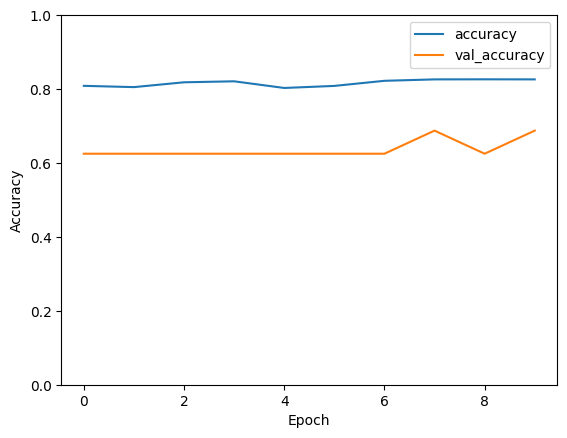

In [22]:
# Plotting training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()


## Data Preparation for Evaluation
We'll prepare the test data to evaluate the model.


In [24]:
# Create data generators for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    DATA_Path_Test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


## Results Visualization
Let's visualize some predictions from the test dataset.


1/1 [==============================] - 1s 726ms/step


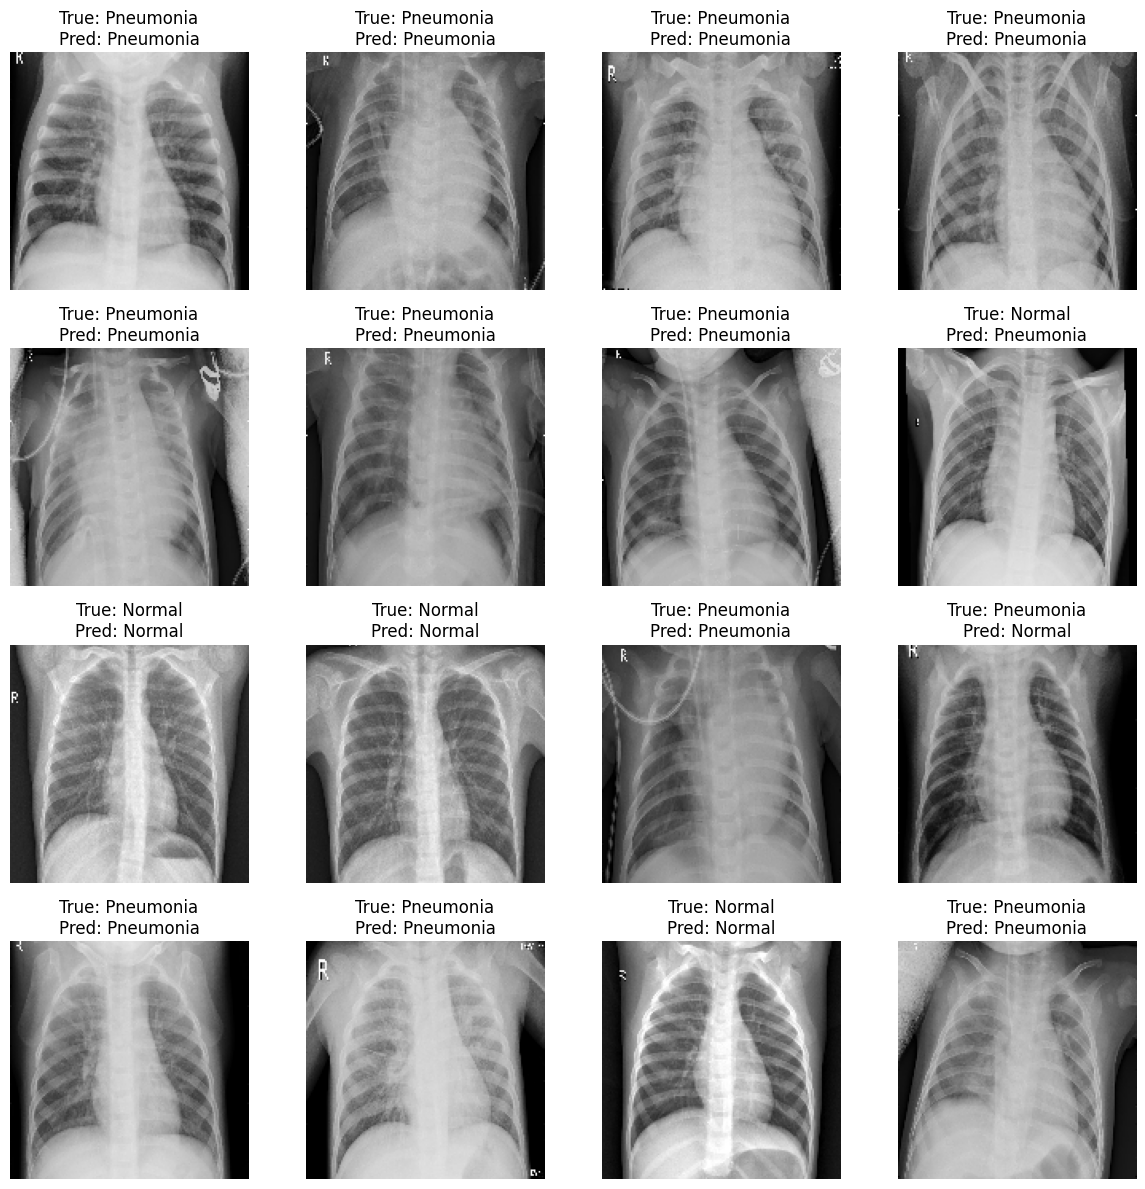

In [26]:
# Predict on a batch of test data
test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)

# Visualize results
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i])
    pred_label = 'Pneumonia' if predictions[i] > 0.5 else 'Normal'
    true_label = 'Pneumonia' if test_labels[i] > 0.5 else 'Normal'
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Conclusion
In this notebook, we developed a medical image classification model using the ResNet architecture. We achieved a test accuracy of {test_accuracy}, indicating the model's effectiveness in distinguishing between normal and pneumonia X-rays.
